In [29]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from attrs import *

In [2]:
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
cars = pd.read_csv('datasets/Car_Dataset.csv', index_col="car_ID")
df_cars = cars.copy()
df_cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [5]:
df_cars.dtypes.value_counts()

object     10
float64     8
int64       7
dtype: int64

In [6]:
df_cars.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [7]:
df_cars.select_dtypes("object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
5,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
201,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
203,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi


In [8]:
for column in df_cars.select_dtypes("object"):
    print(column)
    print(df_cars[column].value_counts(), "\n")

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64 

fueltype
gas       185
diesel     20
Name: fueltype, dtype: int64 

aspiration
std      168
turbo     37
Name: aspiration, dtype: int64 

doornumber
four    115
two      90
Name: doornumber, dtype: int64 

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64 

drivewheel
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64 

enginelocation
front    202
rear       3
Name: enginelocation, dtype: int64 

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64 

cylindernumber
four      159
six       

In [9]:
df_cars:pd.DataFrame = df_cars.drop("CarName", 1)

C:\Users\abdesol\AppData\Local\Temp/ipykernel_5308/3399478028.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_cars:pd.DataFrame = df_cars.drop("CarName", 1)


In [10]:
[column for column in df_cars.columns if df_cars[column].value_counts().count() <= 10]

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

<Figure size 2160x2160 with 0 Axes>

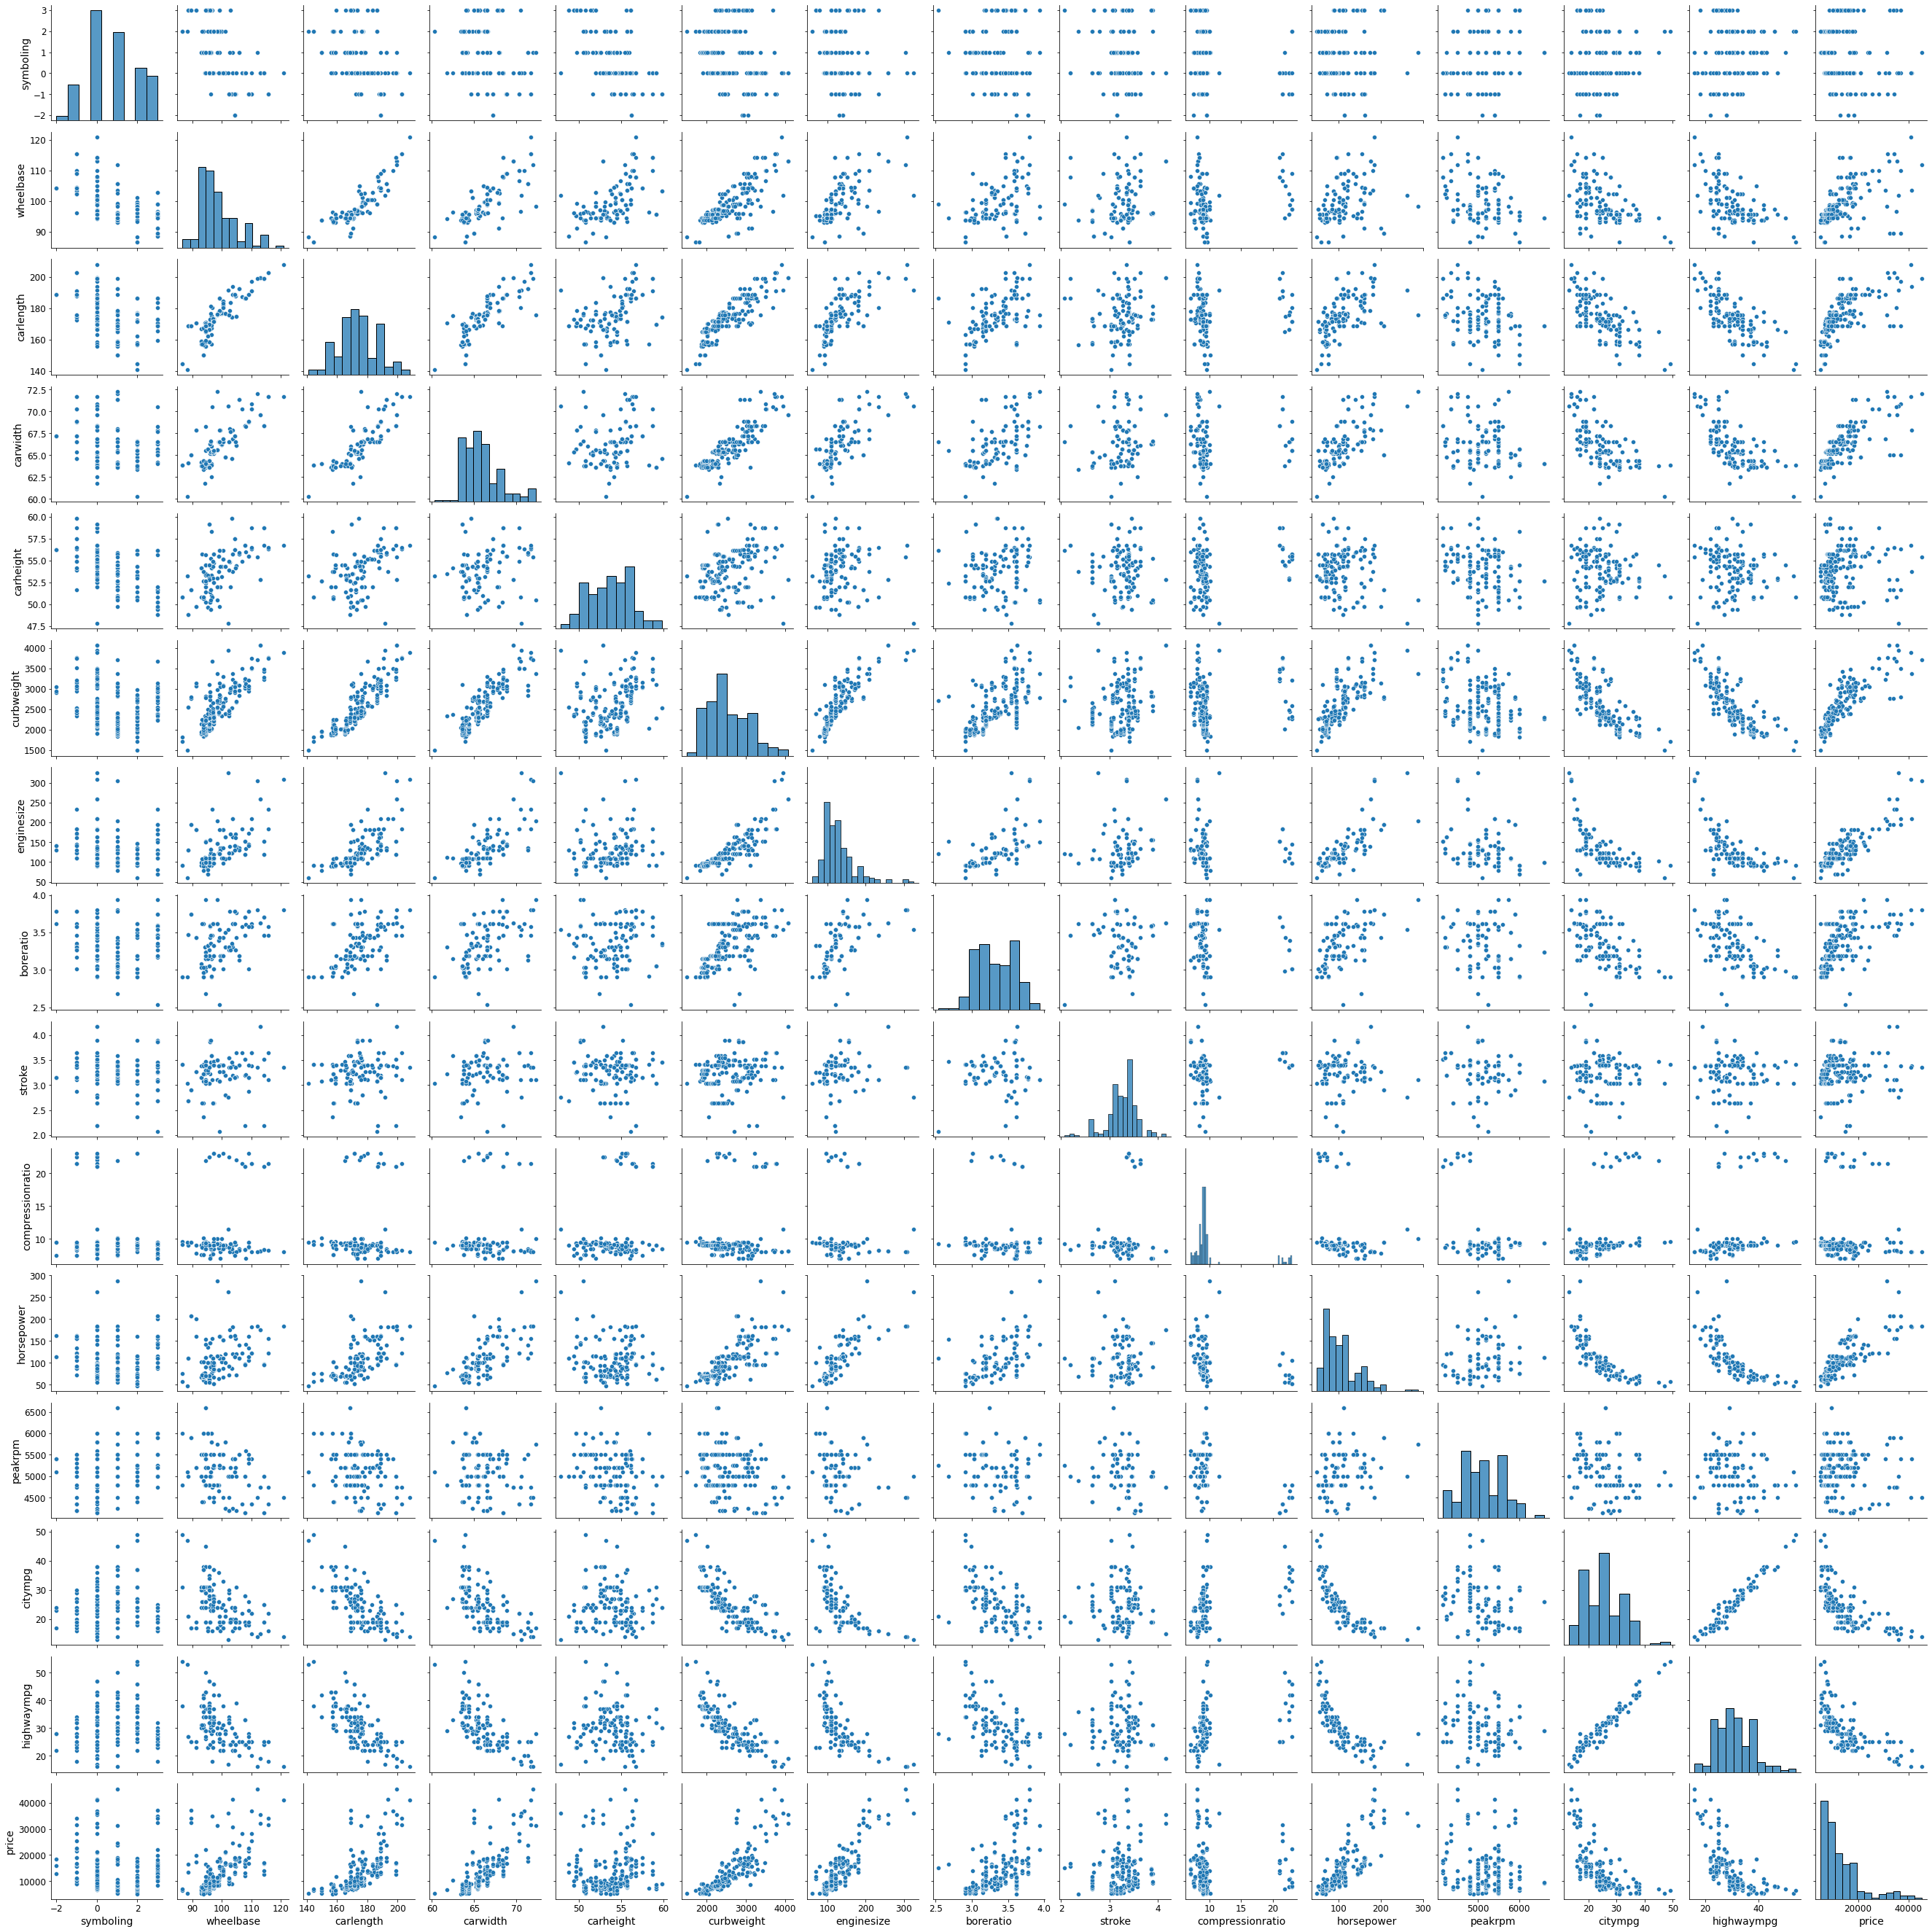

In [11]:
plt.figure(figsize=(30,30))
sns.pairplot(df_cars)

In [12]:
df_cars["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<AxesSubplot:>

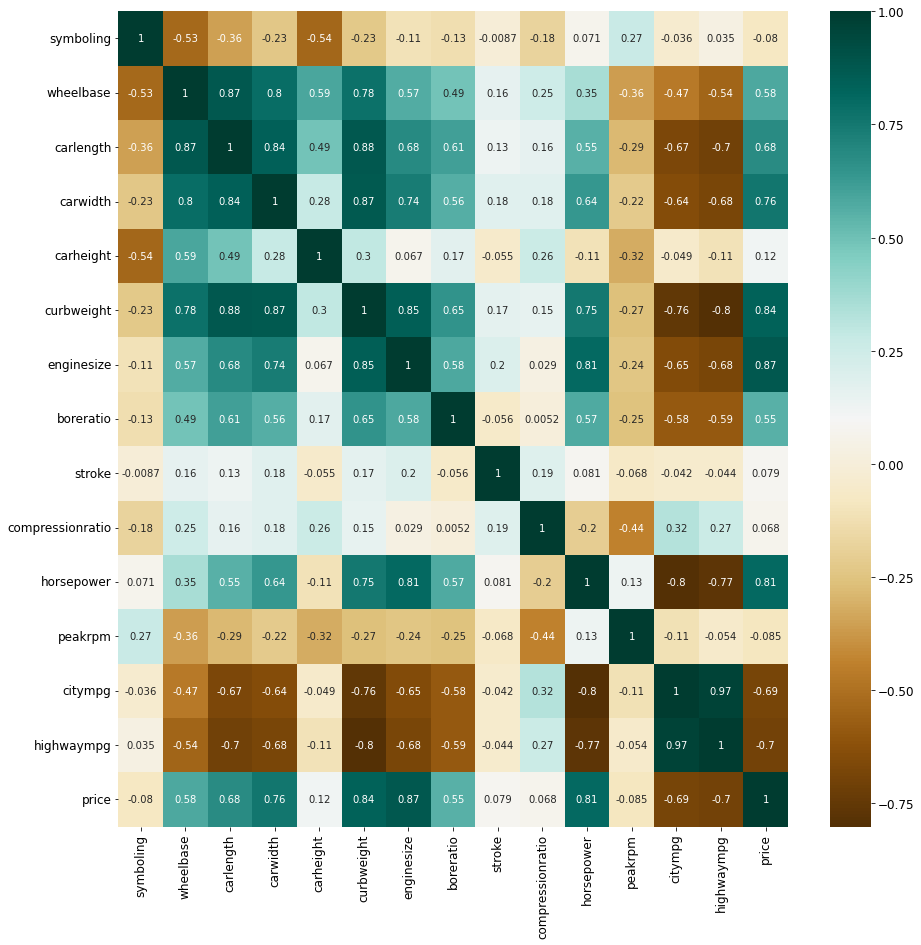

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df_cars.corr(), annot=True, cmap='BrBG')

In [14]:
df_cars = df_cars.drop("symboling", 1)

C:\Users\abdesol\AppData\Local\Temp/ipykernel_5308/2754943173.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_cars = df_cars.drop("symboling", 1)


In [15]:
y = df_cars["price"]
X = df_cars.drop("price", 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

C:\Users\abdesol\AppData\Local\Temp/ipykernel_5308/3933905655.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_cars.drop("price", 1)


In [16]:
ordinal_cats = ['aspiration', 'doornumber', 'drivewheel', 'cylindernumber']
nominal_cats = ['fueltype', 'carbody', 'enginelocation', 'enginetype', 'fuelsystem']

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

class MultiColumnOneHotEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        OneHotEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = OneHotEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = OneHotEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [18]:
from sklearn.pipeline import Pipeline

cat_pipeline = Pipeline([
    ('ordinal_cat', MultiColumnLabelEncoder(columns=ordinal_cats)),
    ('nominal_cat', MultiColumnLabelEncoder(columns=nominal_cats))
])

X_train = cat_pipeline.fit_transform(X_train)

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
analyze_model(lin_reg, X_test, y_test)

Score: 0.8093593814481552
Predictions: [ 6508.96788229 19024.15141079 13576.07054976 -1971.54949083
 10170.37536718 14257.22349082  6461.28875904  5206.0900647
 21502.53011302  8210.67999538 15289.18872683 29551.90304366
 10298.27859575 13870.93911081  6072.17385128 12743.00175634
  9521.78749809 19357.10499762 10208.82651993  8068.78324959
 10645.00898816 20743.08365037  9989.73878885 13355.95685705
 20997.06442022  6709.94146391  7559.04767958 20770.15491399
  8831.1589208   4832.56907078  8107.86940036 11017.25505526
 17701.58182414  8955.53268857  6231.00614882 24046.57409169
 11074.9087313  14325.73957198  6844.22066076 37751.30094138
  4726.38322361 14175.29721173 33449.87938662 19878.19415033
  9146.11884712  8446.89782946  7441.49327844 13805.55733973
  7986.30378367  9570.23431099 21361.74082683  4263.18464488]
Root mean squared error: 3770.370628396536


In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

poly_reg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_reg.fit(X_train,y_train)
analyze_model(poly_reg, X_test, y_test)

Score: -666.9530842548518
Predictions: [  -4450.81039978 -187978.13753788   17339.85122593  443473.96812891
   81984.5379764   -29071.88320697  -11119.48173047 -115115.89333751
   97022.74092059   93032.94123027  -47759.43017639 -971292.36863032
  265966.04519544  -92517.26213261    3286.05908369  -46002.56183689
   81724.47473012  136883.86018676   36342.78118214    7174.23418765
  109548.30159314   32442.28126163   96178.1122984   -76202.03734792
 -127190.59829825 -110025.8950947   -19733.22977015  173279.42470773
  -13645.08438032  -41553.74266719   14054.36702222  108138.97989136
 -156449.22006315  -98839.38690884  -33663.02675676  -36577.09854459
  143971.19550924  -65637.06927833   37717.23588087   33455.18432258
   16133.64995584  -25533.25821752  242423.97625323 -258258.64061275
  563192.88915854   14080.39872732   62460.02289658  127239.60616719
  607222.29469441   56551.26603693   48192.65913304 -481449.91985961]
Root mean squared error: 223176.93253343346


In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
analyze_model(tree_reg, X_test, y_test)

Score: 0.8750034214486665
Predictions: [ 6095. 15690. 13950.  5399.  9495. 17669.  5572.  6918. 17669.  7129.
 21105. 36000. 11845. 15985.  6575. 17669. 13295. 17710.  9095.  6338.
  9279. 16630. 11245. 17669. 16558.  7053.  7738. 12440.  7198.  6649.
  8195. 13845. 17669.  9370.  7499. 30760.  9298. 18620.  6229. 36880.
  6575. 13295. 36880. 12170.  9233.  8238.  6692. 14489. 11048.  8195.
 21485.  7299.]
Root mean squared error: 3052.9900373681585


In [39]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
analyze_model(forest_reg, X_test, y_test)

Score: 0.914746492922832
Predictions: [ 6057.73       16377.69167    13210.07167333  5858.7
 10023.48666667 13597.52666667  5932.08        7444.05
 17348.28585     6716.97       19850.275      34521.14167
 12122.01       14418.465       6431.2        12911.29166667
 12137.71166667 17584.99334     8652.08        6560.83
  9430.45       15432.765      11000.77833333 13538.91666667
 17251.42503     7338.35        7624.84       14487.725
  8097.18        6848.28        8235.34       12696.32
 15414.38333333 10230.85666667  7188.03       33236.13
  9367.8        16669.23669     5917.81       36286.64
  6299.82       14808.45501    33835.37142857 12765.795
 10293.07        7845.22        6669.17       14215.93333333
 13021.295       8380.17       19197.3067      7472.73      ]
Root mean squared error: 2521.346022604279


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, "auto"]},
    {'bootstrap': [False, True], 'n_estimators': [3, 10, 100], 'max_features': [2, 3, 4, "auto"]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 'auto'],
                          'n_estimators': [3, 10, 30, 100]},
                         {'bootstrap': [False, True],
                          'max_features': [2, 3, 4, 'auto'],
                          'n_estimators': [3, 10, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 100}

In [48]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2913.8148125684147 {'max_features': 2, 'n_estimators': 3}
2570.336576558089 {'max_features': 2, 'n_estimators': 10}
2404.91825286323 {'max_features': 2, 'n_estimators': 30}
2509.673905891597 {'max_features': 2, 'n_estimators': 100}
3081.13613904094 {'max_features': 4, 'n_estimators': 3}
2462.7299614403723 {'max_features': 4, 'n_estimators': 10}
2242.574438864564 {'max_features': 4, 'n_estimators': 30}
2317.181082516296 {'max_features': 4, 'n_estimators': 100}
3159.4700182823153 {'max_features': 6, 'n_estimators': 3}
2283.763052089056 {'max_features': 6, 'n_estimators': 10}
2251.416422367089 {'max_features': 6, 'n_estimators': 30}
2240.667036695988 {'max_features': 6, 'n_estimators': 100}
3036.3728205208477 {'max_features': 8, 'n_estimators': 3}
2408.5086116707084 {'max_features': 8, 'n_estimators': 10}
2333.4224190852888 {'max_features': 8, 'n_estimators': 30}
2205.8896415045756 {'max_features': 8, 'n_estimators': 100}
3052.241033659865 {'max_features': 'auto', 'n_estimators': 3}
2278.

In [55]:
analyze_model(grid_search.best_estimator_, X_test, y_test)

Score: 0.9236480082753681
Predictions: [ 6120.89    16024.94    13613.95501  7189.92     9781.12     9984.67
  5857.81     7998.62    18152.095    7122.18    19404.605   30463.66
 11845.      13070.22     6526.19    10017.71    11593.715   17902.96167
  9005.39     6459.32     9489.365   16771.46    10941.32    10371.93
 16666.87334  7353.22     7551.64    14733.82     8347.98     6659.34
  8306.63    12698.155   17298.41667 10765.7      7429.38    30340.71
 10097.155   17363.33168  5993.46    38151.4      6416.48    14865.75336
 34543.81    12722.89667 10776.62     7383.6      6696.34    14205.65334
 11476.98     8380.09    22204.44006  7664.22   ]
Root mean squared error: 2386.0882913190217


In [56]:
best_model = grid_search.best_estimator_

In [58]:
import joblib

joblib.dump(best_model, "model/forest_reg_model.pkl")

['model/forest_reg_model.pkl']